### KB testing

### EUADR skip 1

In [156]:
import pandas as pd
seeds = [0,42,144]
results_df = pd.DataFrame(columns=['seed','% sample_size', '# of relations', '# of additional relations skip 1',"% of additional relations skip 1"])

dataset = "euadr"
# sample_size = 20
for seed in seeds:
    # print(f"SEED value: {seed}")
    for sample_size in range(10,101, 10):
        kb_ = pd.read_csv(f"/home/016651544/gemma/samples/{seed}/{dataset}/processed_csvs/{sample_size}_sample_val_{dataset}.csv")
        original_sample = pd.read_csv(f"/home/016651544/gemma/samples/{seed}/{dataset}/{sample_size}_sample_val_{dataset}.csv")
        full_data = pd.read_csv(f"/home/016651544/gemma/{dataset}_unmasked.csv")
        # Create tuples of entity combinations in both dataframes
        original_sample['entity_pair'] = original_sample.apply(lambda row: tuple(sorted([row['ENTITY1_TEXT'].lower(), row['ENTITY2_TEXT'].lower()])), axis=1)
        kb_['entity_pair'] = kb_.apply(lambda row: tuple(sorted([row['ent1'].lower(), row['ent2'].lower()])), axis=1)
        # Check if the entity pairs in df2 are present in df1
        kb_['is_present'] = kb_['entity_pair'].isin(original_sample['entity_pair'])
        
        # Count the matches
        matches_count = kb_['is_present'].sum()
        # print(f"Number of matching pairs: {matches_count}")
        # print(original_sample['entity_pair'].shape, kb_['entity_pair'].shape)
        percentage_additional = ((kb_['entity_pair'].shape[0] - matches_count) / original_sample['entity_pair'].shape[0]) * 100
        print(kb_.shape[0])
        results_df = results_df.append({
            'seed': seed,
           '% sample_size': sample_size,
             '# of relations': len(original_sample['entity_pair'].unique()),
            '# of additional relations skip 1': kb_['entity_pair'].shape[0],
            '% of additional relations skip 1': percentage_additional#(original_sample['entity_pair'].shape[0]+kb_['entity_pair'].shape[0])*100/original_sample['entity_pair'].shape[0]
        }, ignore_index=True)


results_df[['seed', '% sample_size','# of relations', '# of additional relations skip 1']] = results_df[['seed','% sample_size', '# of relations', '# of additional relations skip 1']].astype(int)

12
51
89
178
258
349
450
582
706
798
12
44
116


/tmp/ipykernel_76037/3497506773.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3497506773.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3497506773.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3497506773.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3497506773.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


184
268
344
455
612
736
838
6
38
108
169
235
310
405
556


/tmp/ipykernel_76037/3497506773.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3497506773.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3497506773.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3497506773.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3497506773.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


745
837


/tmp/ipykernel_76037/3497506773.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3497506773.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [157]:
results_df

,seed,% sample_size,# of relations,# of additional relations skip 1,% of additional relations skip 1
0,0,10,33,12,34.285714
1,0,20,69,51,71.830986
2,0,30,98,89,83.962264
3,0,40,128,178,125.352113
4,0,50,160,258,145.762712
5,0,60,192,349,163.849765
6,0,70,219,450,181.451613
7,0,80,245,582,204.929577
8,0,90,273,706,221.316614
9,0,100,290,798,224.788732


In [158]:
average_df_1 = results_df.groupby('% sample_size').mean().reset_index()

In [159]:
average_df_1[['% sample_size','# of relations', '# of additional relations skip 1','% of additional relations skip 1']]

,% sample_size,# of relations,# of additional relations skip 1,% of additional relations skip 1
0,10,33.333333,10.000000,28.571429
1,20,67.000000,44.333333,62.441315
2,30,99.000000,104.333333,98.427673
3,40,130.000000,177.000000,124.647887
4,50,160.000000,253.666667,143.314501
5,60,189.666667,334.333333,156.964006
6,70,216.333333,436.666667,176.075269
7,80,243.666667,583.333333,205.399061
8,90,272.000000,729.000000,228.526646
9,100,289.333333,824.333333,232.206573


### EUADR skip 2

In [160]:
import pandas as pd
seeds = [0,42,144]
results_df = pd.DataFrame(columns=['seed','% sample_size', '# of relations', '# of additional relations skip 2',"% of additional relations skip 2"])

dataset = "euadr"
# sample_size = 20
for seed in seeds:
    print(f"SEED value: {seed}")
    for sample_size in range(10,101, 10):
        kb_ = pd.read_csv(f"/home/016651544/gemma/samples/{seed}/{dataset}/processed_csvs_skip_2/{sample_size}_sample_val_{dataset}.csv")
        original_sample = pd.read_csv(f"/home/016651544/gemma/samples/{seed}/{dataset}/{sample_size}_sample_val_{dataset}.csv")
        full_data = pd.read_csv(f"/home/016651544/gemma/{dataset}_unmasked.csv")
        # Create tuples of entity combinations in both dataframes
        original_sample['entity_pair'] = original_sample.apply(lambda row: tuple(sorted([row['ENTITY1_TEXT'].lower(), row['ENTITY2_TEXT'].lower()])), axis=1)
        kb_['entity_pair'] = kb_.apply(lambda row: tuple(sorted([row['ent1'].lower(), row['ent2'].lower()])), axis=1)
        # Check if the entity pairs in df2 are present in df1
        kb_['is_present'] = kb_['entity_pair'].isin(original_sample['entity_pair'])
        
        # Count the matches
        matches_count = kb_['is_present'].sum()
        print(f"Number of matching pairs: {matches_count}")
        # print(original_sample['entity_pair'].shape, kb_['entity_pair'].shape)
        percentage_additional = ((kb_['entity_pair'].shape[0] - matches_count) / original_sample['entity_pair'].shape[0]) * 100

        results_df = results_df.append({
            'seed': seed,
           '% sample_size': sample_size,
             '# of relations': len(original_sample['entity_pair'].unique()),
            '# of additional relations skip 2': kb_['entity_pair'].shape[0],
            '% of additional relations skip 2': percentage_additional#(original_sample['entity_pair'].shape[0]+kb_['entity_pair'].shape[0])*100/original_sample['entity_pair'].shape[0]
        }, ignore_index=True)


results_df[['seed', '% sample_size','# of relations', '# of additional relations skip 2']] = results_df[['seed','% sample_size', '# of relations', '# of additional relations skip 2']].astype(int)

SEED value: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_76037/3885630333.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3885630333.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3885630333.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3885630333.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3885630333.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Number of matching pairs: 0
SEED value: 42
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_76037/3885630333.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3885630333.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3885630333.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3885630333.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3885630333.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
SEED value: 144
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_76037/3885630333.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3885630333.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3885630333.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3885630333.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3885630333.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_76037/3885630333.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3885630333.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3885630333.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_76037/3885630333.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3885630333.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [161]:
# results_df

In [162]:
average_df_2 = results_df.groupby('% sample_size').mean().reset_index()

In [163]:
average_df_2[['% sample_size','# of relations', '# of additional relations skip 2','% of additional relations skip 2']]

,% sample_size,# of relations,# of additional relations skip 2,% of additional relations skip 2
0,10,33.333333,10.333333,29.523810
1,20,67.000000,51.333333,72.300469
2,30,99.000000,126.000000,118.867925
3,40,130.000000,229.000000,161.267606
4,50,160.000000,330.666667,186.817326
5,60,189.666667,442.666667,207.824726
6,70,216.333333,588.000000,237.096774
7,80,243.666667,789.333333,277.934272
8,90,272.000000,988.333333,309.822362
9,100,289.333333,1132.666667,319.061033


### SKIP 3

In [164]:
import pandas as pd
seeds = [0,42,144]
results_df = pd.DataFrame(columns=['seed','% sample_size', '# of relations', '# of additional relations skip 3',"% of additional relations skip 3"])

dataset = "euadr"
# sample_size = 20
for seed in seeds:
    print(f"SEED value: {seed}")
    for sample_size in range(10,101, 10):
        kb_ = pd.read_csv(f"/home/016651544/gemma/samples/{seed}/{dataset}/processed_csvs_skip_3/{sample_size}_sample_val_{dataset}.csv")
        original_sample = pd.read_csv(f"/home/016651544/gemma/samples/{seed}/{dataset}/{sample_size}_sample_val_{dataset}.csv")
        full_data = pd.read_csv(f"/home/016651544/gemma/{dataset}_unmasked.csv")
        # Create tuples of entity combinations in both dataframes
        original_sample['entity_pair'] = original_sample.apply(lambda row: tuple(sorted([row['ENTITY1_TEXT'].lower(), row['ENTITY2_TEXT'].lower()])), axis=1)
        kb_['entity_pair'] = kb_.apply(lambda row: tuple(sorted([row['ent1'].lower(), row['ent2'].lower()])), axis=1)
        # Check if the entity pairs in df2 are present in df1
        kb_['is_present'] = kb_['entity_pair'].isin(original_sample['entity_pair'])
        
        # Count the matches
        matches_count = kb_['is_present'].sum()
        print(f"Number of matching pairs: {matches_count}")
        # print(original_sample['entity_pair'].shape, kb_['entity_pair'].shape)
        percentage_additional = ((kb_['entity_pair'].shape[0] - matches_count) / original_sample['entity_pair'].shape[0]) * 100

        results_df = results_df.append({
            'seed': seed,
           '% sample_size': sample_size,
             '# of relations': len(original_sample['entity_pair'].unique()),
            '# of additional relations skip 3': kb_['entity_pair'].shape[0],
            '% of additional relations skip 3': percentage_additional#(original_sample['entity_pair'].shape[0]+kb_['entity_pair'].shape[0])*100/original_sample['entity_pair'].shape[0]
        }, ignore_index=True)


results_df[['seed', '% sample_size','# of relations', '# of additional relations skip 3']] = results_df[['seed','% sample_size', '# of relations', '# of additional relations skip 3']].astype(int)

SEED value: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Number of matching pairs: 0
SEED value: 42
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Number of matching pairs: 0
Number of matching pairs: 0
SEED value: 144
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_76037/3995674344.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [165]:
results_df

,seed,% sample_size,# of relations,# of additional relations skip 3,% of additional relations skip 3
0,0,10,33,13,37.142857
1,0,20,69,58,81.690141
2,0,30,98,116,109.433962
3,0,40,128,319,224.647887
4,0,50,160,458,258.757062
5,0,60,192,608,285.446009
6,0,70,219,784,316.129032
7,0,80,245,998,351.408451
8,0,90,273,1222,383.072100
9,0,100,290,1447,407.605634


In [166]:
average_df_3 = results_df.groupby('% sample_size').mean().reset_index()

In [167]:
average_df_3[['% sample_size','# of relations', '# of additional relations skip 3','% of additional relations skip 3']]

,% sample_size,# of relations,# of additional relations skip 3,% of additional relations skip 3
0,10,33.333333,10.333333,29.523810
1,20,67.000000,56.666667,79.812207
2,30,99.000000,146.000000,137.735849
3,40,130.000000,292.000000,205.633803
4,50,160.000000,433.000000,244.632768
5,60,189.666667,595.666667,279.655712
6,70,216.333333,781.666667,315.188172
7,80,243.666667,1035.666667,364.671362
8,90,272.000000,1298.666667,407.105538
9,100,289.333333,1491.000000,420.000000


In [168]:
average_df_1

,% sample_size,seed,# of relations,# of additional relations skip 1,% of additional relations skip 1
0,10,62.0,33.333333,10.000000,28.571429
1,20,62.0,67.000000,44.333333,62.441315
2,30,62.0,99.000000,104.333333,98.427673
3,40,62.0,130.000000,177.000000,124.647887
4,50,62.0,160.000000,253.666667,143.314501
5,60,62.0,189.666667,334.333333,156.964006
6,70,62.0,216.333333,436.666667,176.075269
7,80,62.0,243.666667,583.333333,205.399061
8,90,62.0,272.000000,729.000000,228.526646
9,100,62.0,289.333333,824.333333,232.206573


In [169]:
average_df_2

,% sample_size,seed,# of relations,# of additional relations skip 2,% of additional relations skip 2
0,10,62.0,33.333333,10.333333,29.523810
1,20,62.0,67.000000,51.333333,72.300469
2,30,62.0,99.000000,126.000000,118.867925
3,40,62.0,130.000000,229.000000,161.267606
4,50,62.0,160.000000,330.666667,186.817326
5,60,62.0,189.666667,442.666667,207.824726
6,70,62.0,216.333333,588.000000,237.096774
7,80,62.0,243.666667,789.333333,277.934272
8,90,62.0,272.000000,988.333333,309.822362
9,100,62.0,289.333333,1132.666667,319.061033


In [170]:
average_df_3

,% sample_size,seed,# of relations,# of additional relations skip 3,% of additional relations skip 3
0,10,62.0,33.333333,10.333333,29.523810
1,20,62.0,67.000000,56.666667,79.812207
2,30,62.0,99.000000,146.000000,137.735849
3,40,62.0,130.000000,292.000000,205.633803
4,50,62.0,160.000000,433.000000,244.632768
5,60,62.0,189.666667,595.666667,279.655712
6,70,62.0,216.333333,781.666667,315.188172
7,80,62.0,243.666667,1035.666667,364.671362
8,90,62.0,272.000000,1298.666667,407.105538
9,100,62.0,289.333333,1491.000000,420.000000


In [171]:
df_final = pd.merge(average_df_1, average_df_2, on = ['% sample_size','# of relations'], how="inner")
df_final = pd.merge(df_final, average_df_3, on = ['% sample_size','# of relations'], how="inner")

In [172]:
df_final.drop(columns = ['seed','seed_x','seed_y'],inplace=True)

In [173]:
df_final

,% sample_size,# of relations,# of additional relations skip 1,% of additional relations skip 1,# of additional relations skip 2,% of additional relations skip 2,# of additional relations skip 3,% of additional relations skip 3
0,10,33.333333,10.000000,28.571429,10.333333,29.523810,10.333333,29.523810
1,20,67.000000,44.333333,62.441315,51.333333,72.300469,56.666667,79.812207
2,30,99.000000,104.333333,98.427673,126.000000,118.867925,146.000000,137.735849
3,40,130.000000,177.000000,124.647887,229.000000,161.267606,292.000000,205.633803
4,50,160.000000,253.666667,143.314501,330.666667,186.817326,433.000000,244.632768
5,60,189.666667,334.333333,156.964006,442.666667,207.824726,595.666667,279.655712
6,70,216.333333,436.666667,176.075269,588.000000,237.096774,781.666667,315.188172
7,80,243.666667,583.333333,205.399061,789.333333,277.934272,1035.666667,364.671362
8,90,272.000000,729.000000,228.526646,988.333333,309.822362,1298.666667,407.105538
9,100,289.333333,824.333333,232.206573,1132.666667,319.061033,1491.000000,420.000000


In [174]:
columns = ['# of relations','# of additional relations skip 1','# of additional relations skip 2','# of additional relations skip 3',
       '% of additional relations skip 1', '% of additional relations skip 2', 
       '% of additional relations skip 3']
df_final[columns] = df_final[columns].round(2)
df_final['sample_size'] = [12, 51, 89, 178, 258, 349, 450, 582, 706, 798]
df_final

,% sample_size,# of relations,# of additional relations skip 1,% of additional relations skip 1,# of additional relations skip 2,% of additional relations skip 2,# of additional relations skip 3,% of additional relations skip 3,sample_size
0,10,33.33,10.00,28.57,10.33,29.52,10.33,29.52,12
1,20,67.00,44.33,62.44,51.33,72.30,56.67,79.81,51
2,30,99.00,104.33,98.43,126.00,118.87,146.00,137.74,89
3,40,130.00,177.00,124.65,229.00,161.27,292.00,205.63,178
4,50,160.00,253.67,143.31,330.67,186.82,433.00,244.63,258
5,60,189.67,334.33,156.96,442.67,207.82,595.67,279.66,349
6,70,216.33,436.67,176.08,588.00,237.10,781.67,315.19,450
7,80,243.67,583.33,205.40,789.33,277.93,1035.67,364.67,582
8,90,272.00,729.00,228.53,988.33,309.82,1298.67,407.11,706
9,100,289.33,824.33,232.21,1132.67,319.06,1491.00,420.00,798


In [175]:
cols= [ 'sample_size','# of relations','% of additional relations skip 1', '% of additional relations skip 2', 
       '% of additional relations skip 3']
df_final[cols]

,sample_size,# of relations,% of additional relations skip 1,% of additional relations skip 2,% of additional relations skip 3
0,12,33.33,28.57,29.52,29.52
1,51,67.00,62.44,72.30,79.81
2,89,99.00,98.43,118.87,137.74
3,178,130.00,124.65,161.27,205.63
4,258,160.00,143.31,186.82,244.63
5,349,189.67,156.96,207.82,279.66
6,450,216.33,176.08,237.10,315.19
7,582,243.67,205.40,277.93,364.67
8,706,272.00,228.53,309.82,407.11
9,798,289.33,232.21,319.06,420.00


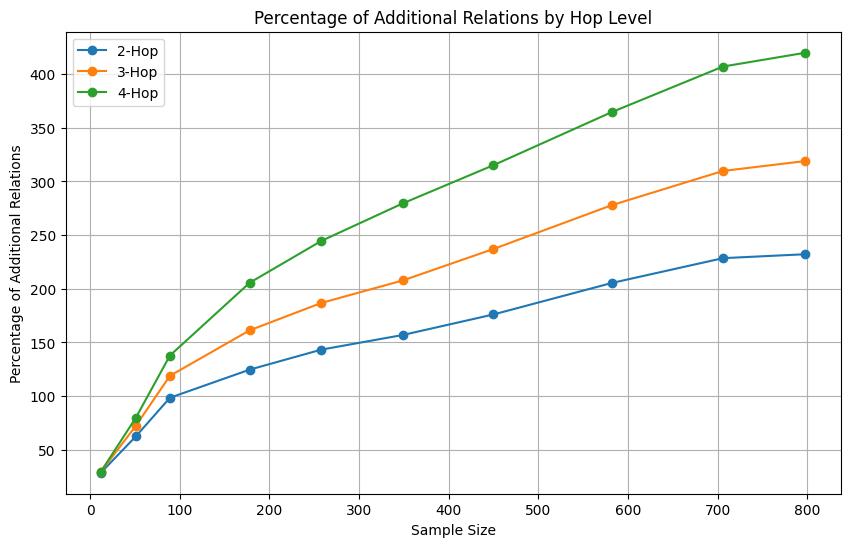

In [176]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df_final['sample_size'], df_final['% of additional relations skip 1'], label='2-Hop', marker='o')
plt.plot(df_final['sample_size'], df_final['% of additional relations skip 2'], label='3-Hop', marker='o')
plt.plot(df_final['sample_size'], df_final['% of additional relations skip 3'], label='4-Hop', marker='o')

# Labeling
plt.title('Percentage of Additional Relations by Hop Level')
plt.xlabel('Sample Size')
plt.ylabel('Percentage of Additional Relations')
plt.legend()
plt.grid(True)
plt.show()

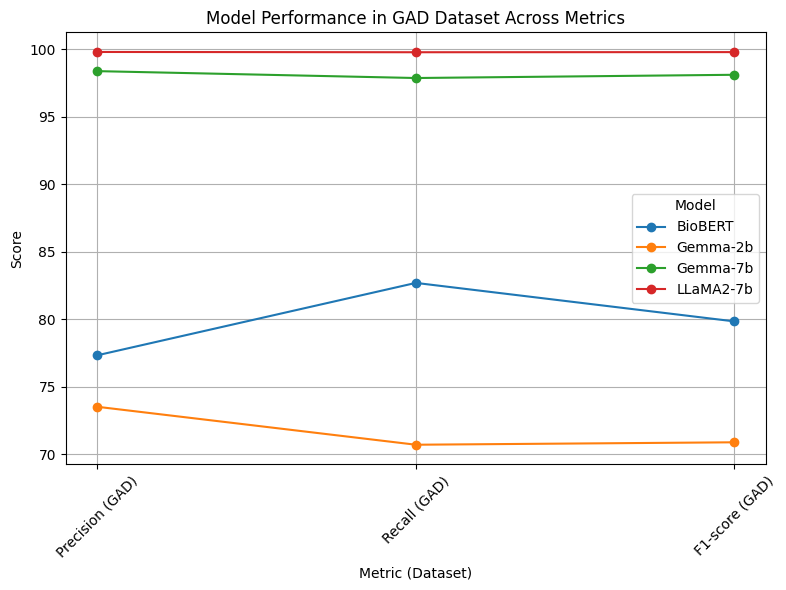

In [106]:
import matplotlib.pyplot as plt

# Define the dataset you want to filter by
selected_dataset = "GAD"  # Change to "EU-ADR" if needed

# Plotting
plt.figure(figsize=(8, 6))
for model in ["BioBERT", "Gemma-2b", "Gemma-7b", "LLaMA2-7b"]:
    # Filter data for each model and plot across metrics for the selected dataset
    filtered_data = df[df['Dataset'] == selected_dataset]
    filtered_data = filtered_data[['Metric', 'Dataset', model]].melt(id_vars=['Metric', 'Dataset'], var_name='Model', value_name='Score')
    metric_dataset = filtered_data['Metric'] + " (" + filtered_data['Dataset'] + ")"
    plt.plot(metric_dataset, filtered_data['Score'], marker='o', label=model)

plt.title(f'Model Performance in {selected_dataset} Dataset Across Metrics')
plt.xlabel('Metric (Dataset)')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.grid(True)
plt.tight_layout()
plt.show()

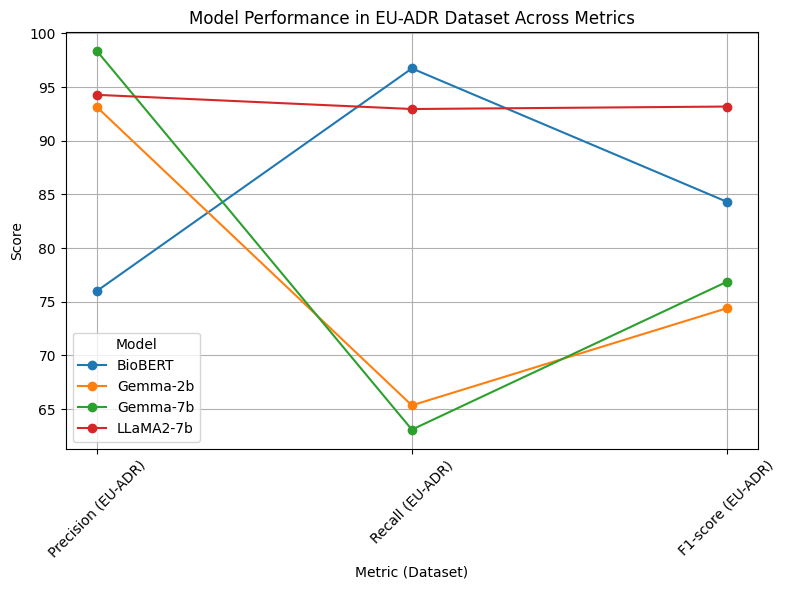

In [105]:
import matplotlib.pyplot as plt

# Define the dataset you want to filter by
selected_dataset = "EU-ADR"  # Change to "EU-ADR" if needed

# Plotting
plt.figure(figsize=(8, 6))
for model in ["BioBERT", "Gemma-2b", "Gemma-7b", "LLaMA2-7b"]:
    # Filter data for each model and plot across metrics for the selected dataset
    filtered_data = df[df['Dataset'] == selected_dataset]
    filtered_data = filtered_data[['Metric', 'Dataset', model]].melt(id_vars=['Metric', 'Dataset'], var_name='Model', value_name='Score')
    metric_dataset = filtered_data['Metric'] + " (" + filtered_data['Dataset'] + ")"
    plt.plot(metric_dataset, filtered_data['Score'], marker='o', label=model)

plt.title(f'Model Performance in {selected_dataset} Dataset Across Metrics')
plt.xlabel('Metric (Dataset)')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.grid(True)
plt.tight_layout()
plt.show()